#Machine Learning on Oral Cancer Dataset

Objective:
Predict the 5 year survival rate for patients with oral cancer using their medical history, clinical diagnosis and demographic information.

Step 1: Preprocessing:

      o Handle missing values (mean/median imputation or KNN imputation).

      o Detect and remove outliers.

      o Encode categorical features (One-Hot or Label Encoding).

      o Normalize/standardize numerical features.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Oral cancer/oral cancer/oral_cancer_prediction_dataset.csv')
data.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

There are no missing values in the data.

In [5]:
data.drop(['ID', 'Country'], axis = 1, inplace = True)

In [6]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.drop('Survival Rate (5-Year, %)',axis=1).select_dtypes(exclude=['object']).columns

# 'Survival Rate (5-Year, %)' is chosen as target feature

In [7]:
cat_cols

Index(['Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection',
       'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene',
       'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer',
       'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding',
       'Difficulty Swallowing', 'White or Red Patches in Mouth',
       'Treatment Type', 'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

In [8]:
num_cols

Index(['Age', 'Tumor Size (cm)', 'Cancer Stage', 'Cost of Treatment (USD)',
       'Economic Burden (Lost Workdays per Year)'],
      dtype='object')

<Axes: >

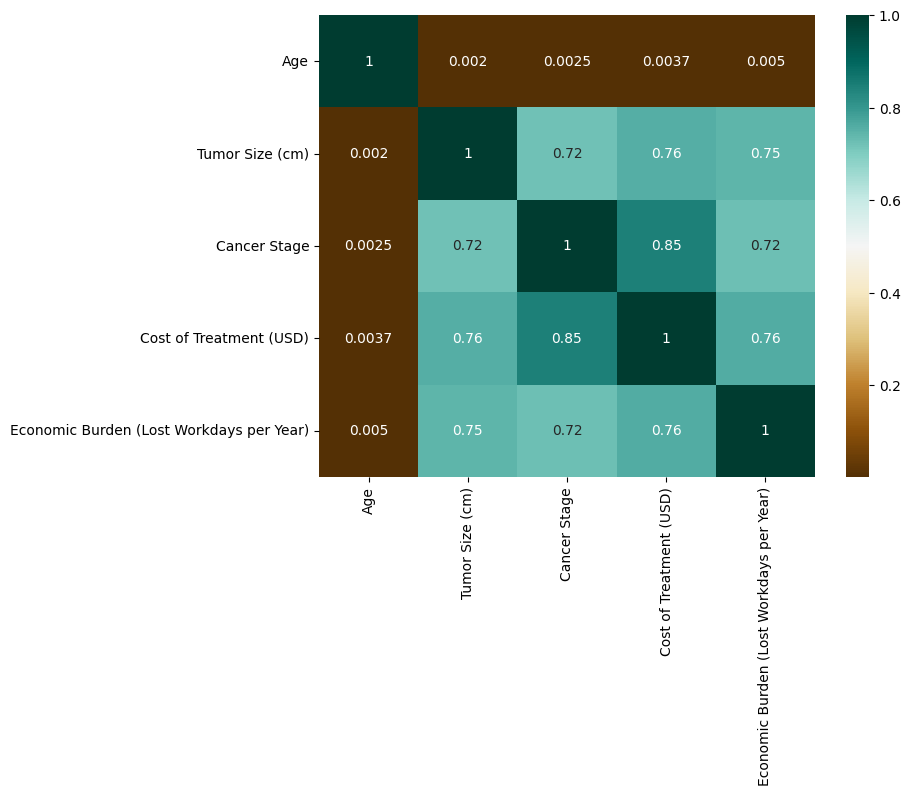

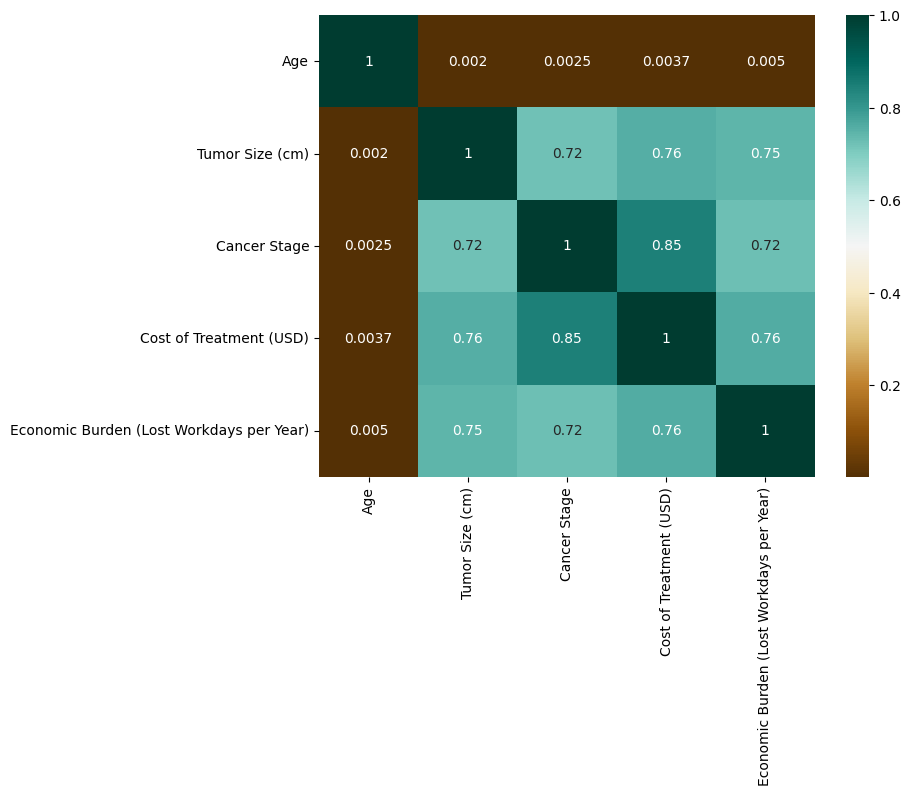

In [9]:
plt.figure(figsize = (8,6))
# Use the numerical data for the heatmap
sns.heatmap(data[num_cols].corr(),annot = True, cmap = 'BrBG')

In [ ]:
#The figure above is the heat map of feature correlation

In [10]:
# Step 1: Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reclassify the target variable into four classes: 0 (0-25), 1 (26-50), 2 (51-75), and 3 (76-100)
def classify_survival_rate(rate):
    if rate <= 25:
        return 0
    elif rate <= 50:
        return 1
    elif rate <= 75:
        return 2
    else:
        return 3
data['Survival Rate (5-Year, %)'] = data['Survival Rate (5-Year, %)'].apply(classify_survival_rate)

# Rename the target variable for clarity
data.rename(columns={'Survival Rate (5-Year, %)': 'Survival Rate (5-Year) Class'}, inplace=True)

data['Survival Rate (5-Year) Class'].value_counts()
# 0: very low survival rate (0-25%), 1: low survival rate (26-50%), 2: medium survival rate (51-75%), 3: high survival rate (76-100%)

,count
Survival Rate (5-Year) Class,
3,55286
2,12865
1,12111
0,4660


In [11]:
#Encode categorical features (One-Hot or Label Encoding).

# Creating a instance of label Encoder.
le = LabelEncoder()

# Apply Label Encoding to the specified columns in the original DataFrame 'data'
for column in cat_cols:
    data[column] = le.fit_transform(data[column])

#Now define your target variable (Y) and features (X):
Y = data['Survival Rate (5-Year) Class'].copy()
X = data.drop('Survival Rate (5-Year) Class', axis=1).copy()


In [12]:
#After encoding, create your training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [13]:
X_train.head()

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,...,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
30250,44,1,1,1,0,0,0,0,2,0,...,0,0,1,3.292122,3,1,76622.00,66,1,1
14251,48,1,1,1,1,0,0,0,1,0,...,0,0,0,4.903198,3,3,135093.00,68,1,1
33768,45,0,1,0,0,0,0,1,2,1,...,0,1,1,1.455814,3,4,63341.25,168,1,1
56436,50,1,1,0,0,1,0,0,2,0,...,0,0,0,3.268220,3,3,59227.00,91,0,1
16915,51,1,1,0,1,0,0,0,2,0,...,0,0,0,3.945706,2,3,113199.00,72,0,1


In [14]:
X_train.shape, Y_train.shape

((67937, 22), (67937,))

In [15]:
X_test.shape, Y_test.shape

((16985, 22), (16985,))

Step 2: Feature Selection:

      o Use techniques like correlation analysis, Chi-square test, or Recursive Feature Elimination (RFE) etc.

In [16]:
#Feature selection using F-statistic
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# 15 features with highest F-statistic are selected
f_reg_features = SelectKBest(f_regression, k=15)  # Change to f_regression
X_kbest_features = f_reg_features.fit_transform(X_train, Y_train) # Changed to f_reg_features

# Get the feature names of the selected features
selected_features = f_reg_features.get_feature_names_out(X_train.columns)
print("Selected features:", selected_features)
# Reduced features
print('Original feature number:', X_train.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Selected features: ['Age' 'Tobacco Use' 'Alcohol Consumption' 'Poor Oral Hygiene'
 'Diet (Fruits & Vegetables Intake)' 'Compromised Immune System'
 'Oral Lesions' 'White or Red Patches in Mouth' 'Tumor Size (cm)'
 'Cancer Stage' 'Treatment Type' 'Cost of Treatment (USD)'
 'Economic Burden (Lost Workdays per Year)' 'Early Diagnosis'
 'Oral Cancer (Diagnosis)']
Original feature number: 22
Reduced feature number: 15


Step 3. Modeling:

      o Train classification models (e.g., Logistic Regression, Random Forest, SVM).

Step 4. Evaluation Metrics:

      o Use Accuracy, Precision, Recall, F1-Score, ROC-AUC.
      o Display confusion matrix and ROC curve.

In [20]:
# Train clasification models Random Forest, Logistic Regression, LightGBM and XGBoost
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to train and evaluate models
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    print(f"Model: {model.__class__.__name__}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,digits=4))

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print()

In [21]:
# Train and evaluate the default models
logistic_model = LogisticRegression(random_state=42)
lgbm = LGBMClassifier(random_state=42, verbose=0)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

Model: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       932
           1     0.3747    0.5566    0.4478      2422
           2     0.3085    0.1337    0.1866      2573
           3     0.8206    0.9107    0.8633     11058

    accuracy                         0.6925     16985
   macro avg     0.3759    0.4002    0.3744     16985
weighted avg     0.6344    0.6925    0.6541     16985



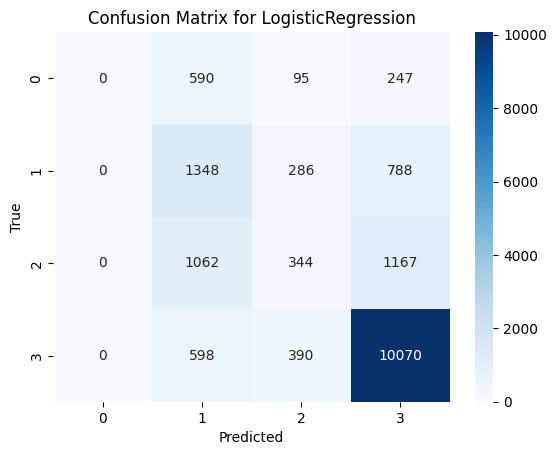


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model: LGBMClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7508    0.9506    0.8390       932
           1     0.9788    0.8786    0.9260      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9800     16985
   macro avg     0.9324    0.9573    0.9413     16985
weighted avg     0.9833    0.9800    0.9806     16985



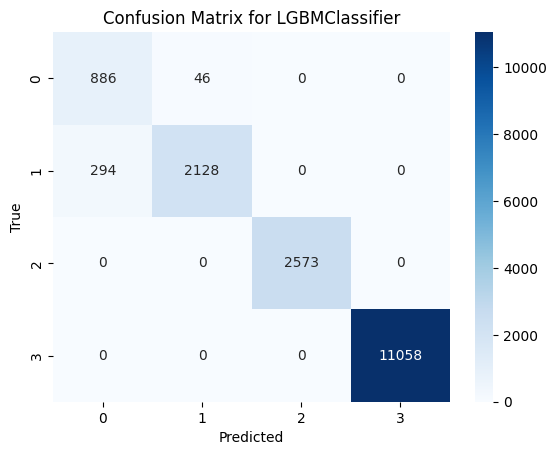


Model: XGBClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7593    0.9206    0.8322       932
           1     0.9667    0.8877    0.9255      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9796     16985
   macro avg     0.9315    0.9521    0.9394     16985
weighted avg     0.9820    0.9796    0.9802     16985



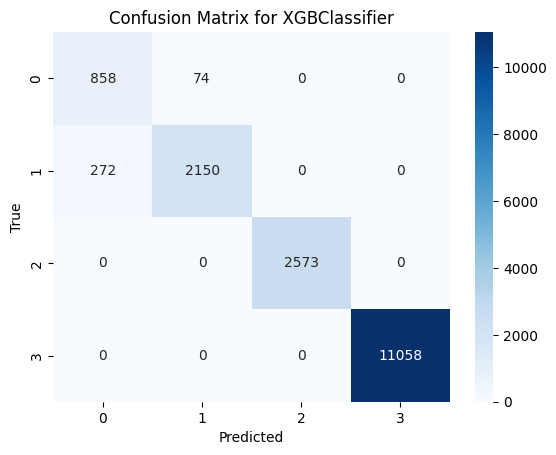


Model: RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7558    0.9496    0.8417       932
           1     0.9785    0.8819    0.9277      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9804     16985
   macro avg     0.9336    0.9579    0.9423     16985
weighted avg     0.9835    0.9804    0.9810     16985



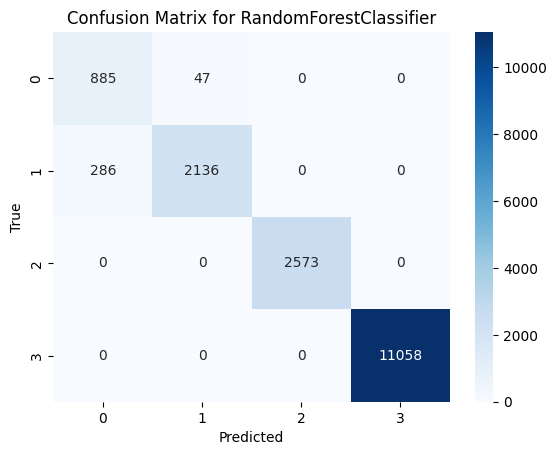

In [22]:
# Train and evaluate each model on validation set with all features
train_and_evaluate_model(logistic_model, X_train, Y_train, X_test, Y_test)
train_and_evaluate_model(lgbm, X_train, Y_train, X_test, Y_test)
train_and_evaluate_model(xgb_model, X_train, Y_train, X_test, Y_test)
train_and_evaluate_model(rf_model, X_train, Y_train, X_test, Y_test)

# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)

Model: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       932
           1     0.4009    0.4897    0.4409      2422
           2     0.3111    0.2487    0.2765      2573
           3     0.8312    0.8997    0.8641     11058

    accuracy                         0.6933     16985
   macro avg     0.3858    0.4095    0.3954     16985
weighted avg     0.6454    0.6933    0.6673     16985



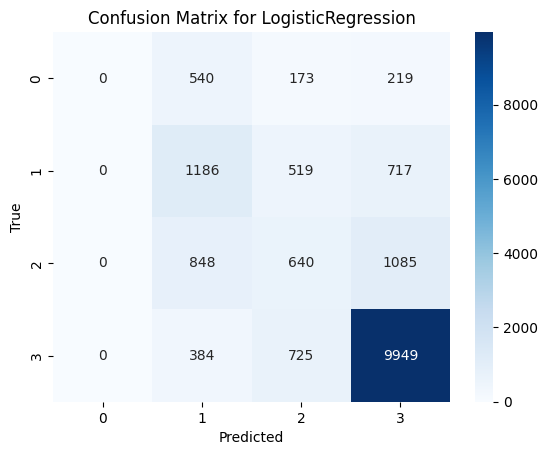


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model: LGBMClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7526    0.9496    0.8397       932
           1     0.9784    0.8799    0.9265      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9801     16985
   macro avg     0.9327    0.9574    0.9415     16985
weighted avg     0.9833    0.9801    0.9807     16985



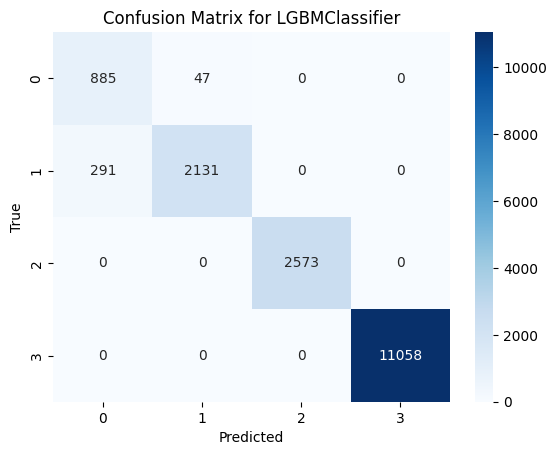


Model: XGBClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7569    0.9120    0.8273       932
           1     0.9632    0.8873    0.9237      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9791     16985
   macro avg     0.9300    0.9498    0.9377     16985
weighted avg     0.9814    0.9791    0.9796     16985



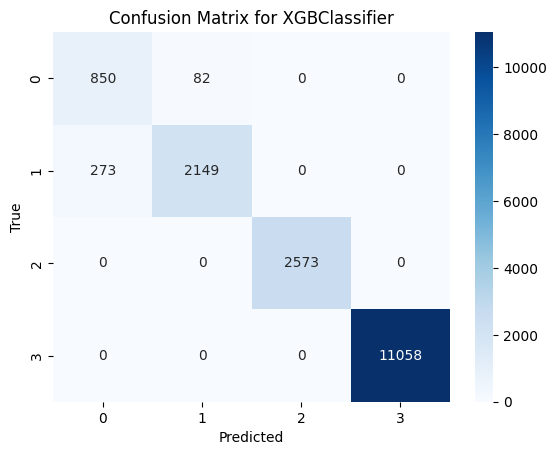


Model: RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7515    0.9442    0.8369       932
           1     0.9762    0.8799    0.9255      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9798     16985
   macro avg     0.9319    0.9560    0.9406     16985
weighted avg     0.9830    0.9798    0.9804     16985



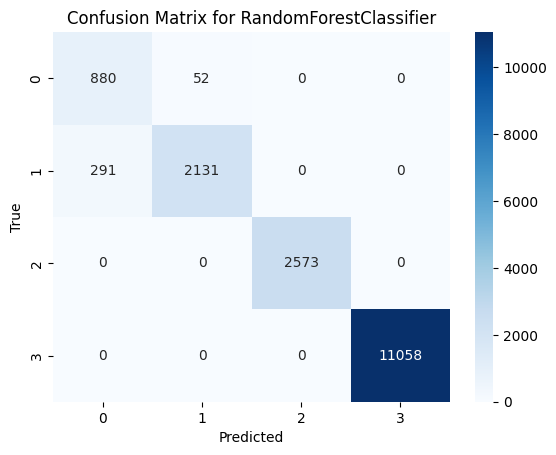

In [23]:
# Train and evaluate each model on test set with selected features
train_and_evaluate_model(logistic_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)
train_and_evaluate_model(lgbm, X_train[selected_features], Y_train, X_test[selected_features], Y_test)
train_and_evaluate_model(xgb_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)
train_and_evaluate_model(rf_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)

# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)
# Accuracy-(selected features): LR(0.6933), LGBM(0.9801), XGB(0.9791), RF(0.9798)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Model: RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7550    0.9785    0.8523       932
           1     0.9907    0.8778    0.9308      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9814     16985
   macro avg     0.9364    0.9641    0.9458     16985
weighted avg     0.9852    0.9814    0.9820     16985



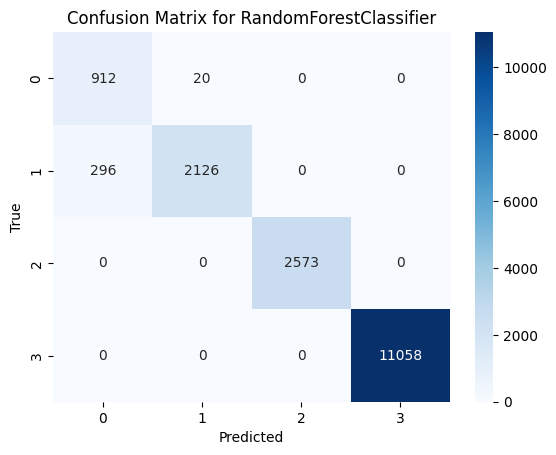

In [24]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search to the training data
grid_search.fit(X_train[selected_features], Y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)
# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
train_and_evaluate_model(best_rf_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)

# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)
# Accuracy-(selected features): LR(0.6933), LGBM(0.9801), XGB(0.9791), RF(0.9798)
# After fine-tuning RF accuracy improved to 0.9814

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

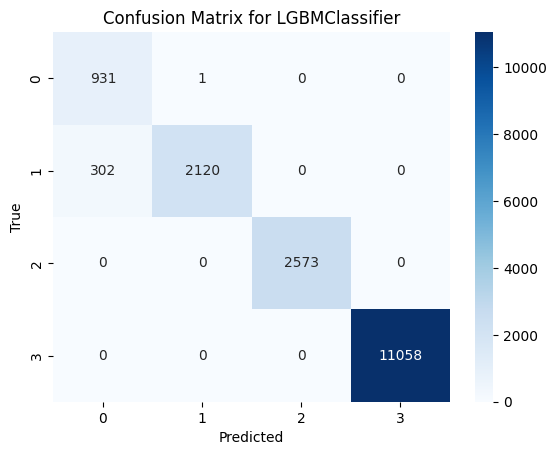

In [25]:
# Hyperparameter tuning for LightGBM
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}
# Create a LightGBM model
lgbm_model = LGBMClassifier(random_state=42, verbose=0)
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)
# Fit the random search to the training data
random_search.fit(X_train[selected_features], Y_train)
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters for LightGBM:", best_params)
# Train the LightGBM model with the best parameters
best_lgbm_model = LGBMClassifier(**best_params, random_state=42, verbose=0)
train_and_evaluate_model(best_lgbm_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)

#Best parameters for LightGBM: {'num_leaves': 31, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)
# Accuracy-(selected features): LR(0.6933), LGBM(0.9801), XGB(0.9791), RF(0.9798)
# After fine-tuning LGBM accuracy improved to 0.9822

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Model: XGBClassifier

Classification Report:
              precision    recall  f1-score   support

           0     0.7553    1.0000    0.8606       932
           1     1.0000    0.8753    0.9335      2422
           2     1.0000    1.0000    1.0000      2573
           3     1.0000    1.0000    1.0000     11058

    accuracy                         0.9822     16985
   macro avg     0.9388    0.9688    0.9485     16985
weighted avg     0.9866    0.9822    0.9829     16985



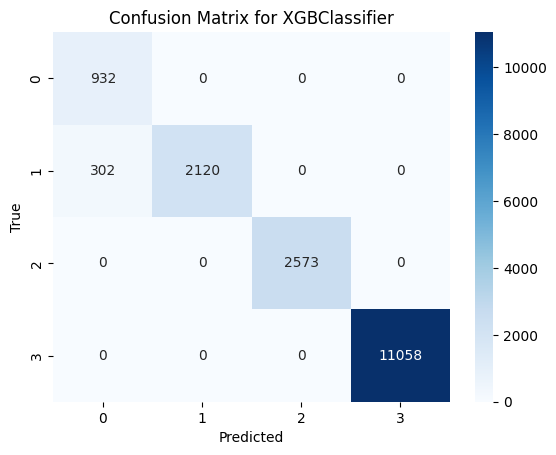

In [26]:
# Hyperparameter tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}
# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)
# Fit the random search to the training data
random_search.fit(X_train[selected_features], Y_train)
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters for XGBoost:", best_params)
# Train the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)
train_and_evaluate_model(best_xgb_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)

# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)
# Accuracy-(selected features): LR(0.6933), LGBM(0.9801), XGB(0.9791), RF(0.9798)
# After fine-tuning XGB accuracy improved to 0.9822

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Model: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0     0.2500    0.0011    0.0021       932
           1     0.3839    0.5380    0.4481      2422
           2     0.3071    0.1652    0.2148      2573
           3     0.8231    0.9083    0.8636     11058

    accuracy                         0.6931     16985
   macro avg     0.4410    0.4031    0.3822     16985
weighted avg     0.6508    0.6931    0.6588     16985



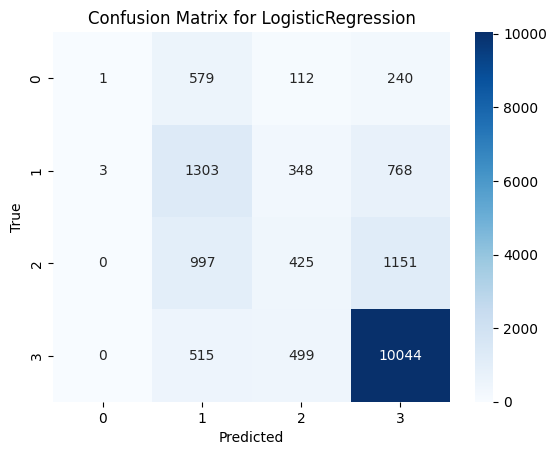

In [27]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'saga']
}
# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)
# Fit the random search to the training data
random_search.fit(X_train[selected_features], Y_train)
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters for Logistic Regression:", best_params)
# Train the Logistic Regression model with the best parameters
best_logistic_model = LogisticRegression(**best_params, random_state=42)
train_and_evaluate_model(best_logistic_model, X_train[selected_features], Y_train, X_test[selected_features], Y_test)

# Accuracy-(all features): LR(0.6925), LGBM(0.9800), XGB(0.9796), RF(0.9804)
# Accuracy-(selected features): LR(0.6933), LGBM(0.9801), XGB(0.9791), RF(0.9798)
# After fine-tuning LR accuracy  did not improve: 0.6931

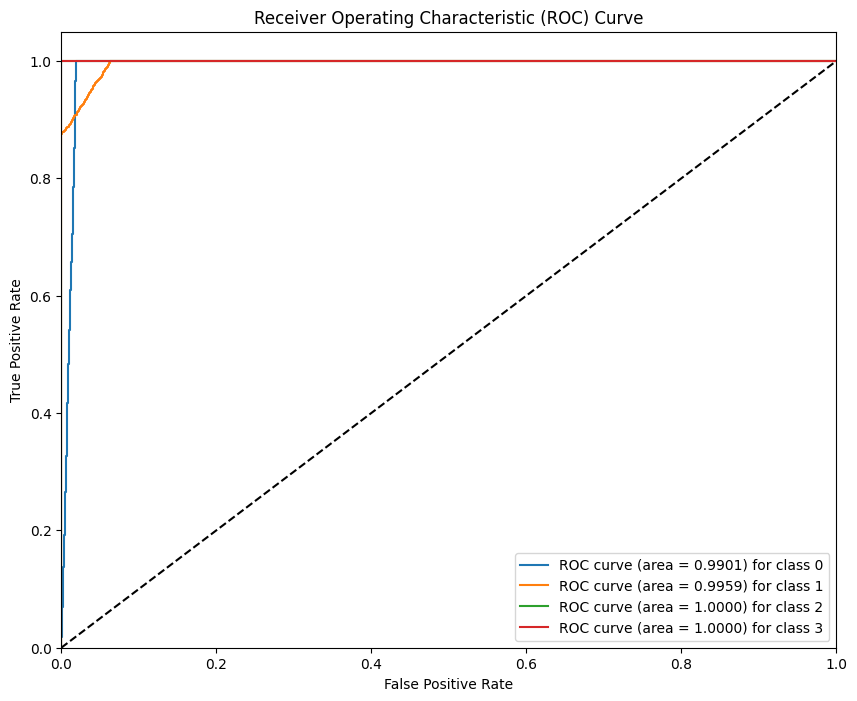

In [29]:
# Visualize Multiclass Receiver Operating Characteristic (ROC) for optimized Random Forest model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
n_classes = Y_test_bin.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class
fpr[0], tpr[0], _ = roc_curve(Y_test_bin[:, 0], best_rf_model.predict_proba(X_test[selected_features])[:, 0])
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(Y_test_bin[:, 1], best_rf_model.predict_proba(X_test[selected_features])[:, 1])
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(Y_test_bin[:, 2], best_rf_model.predict_proba(X_test[selected_features])[:, 2])
roc_auc[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(Y_test_bin[:, 3], best_rf_model.predict_proba(X_test[selected_features])[:, 3])
roc_auc[3] = auc(fpr[3], tpr[3])
# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.4f}) for class {}'.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


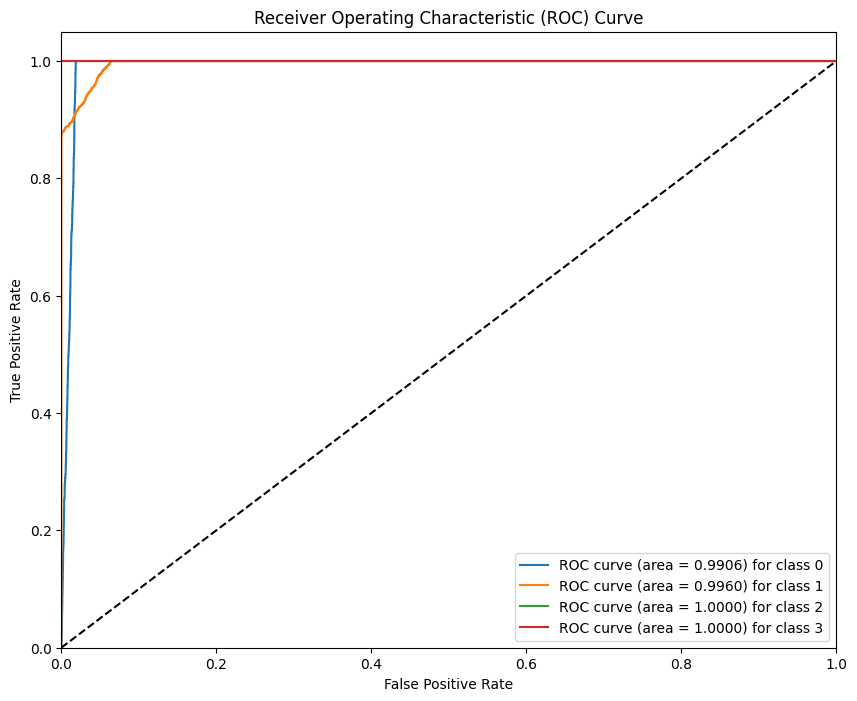

In [30]:
# Visualize Multiclass Receiver Operating Characteristic (ROC) for optimized LightGBM model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
n_classes = Y_test_bin.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class
fpr[0], tpr[0], _ = roc_curve(Y_test_bin[:, 0], best_lgbm_model.predict_proba(X_test[selected_features])[:, 0])
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(Y_test_bin[:, 1], best_lgbm_model.predict_proba(X_test[selected_features])[:, 1])
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(Y_test_bin[:, 2], best_lgbm_model.predict_proba(X_test[selected_features])[:, 2])
roc_auc[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(Y_test_bin[:, 3], best_lgbm_model.predict_proba(X_test[selected_features])[:, 3])
roc_auc[3] = auc(fpr[3], tpr[3])
# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.4f}) for class {}'.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


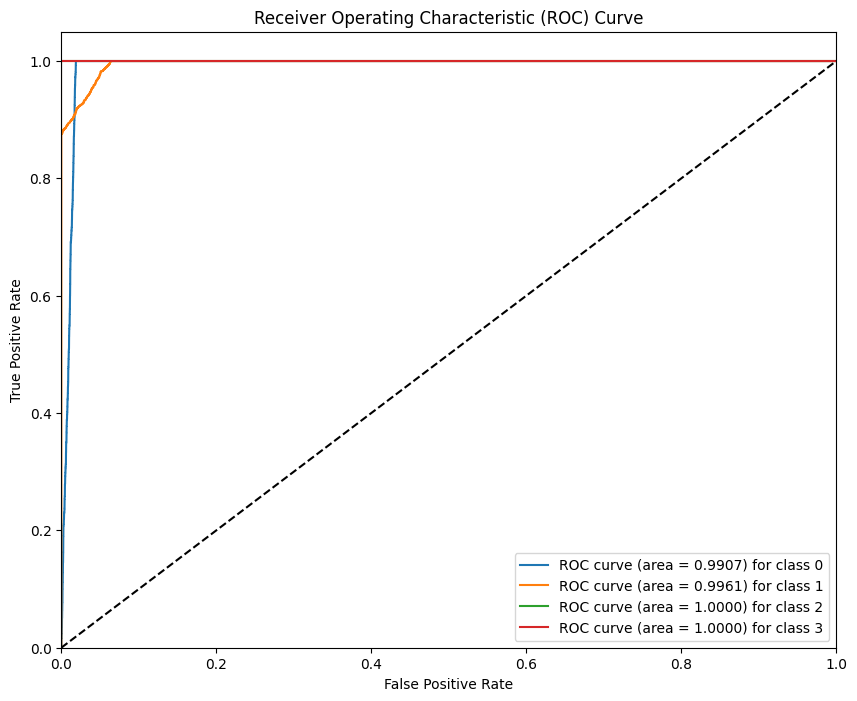

In [32]:
# Visualize Multiclass Receiver Operating Characteristic (ROC) for optimized XGBoost model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
n_classes = Y_test_bin.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class
fpr[0], tpr[0], _ = roc_curve(Y_test_bin[:, 0], best_xgb_model.predict_proba(X_test[selected_features])[:, 0])
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(Y_test_bin[:, 1], best_xgb_model.predict_proba(X_test[selected_features])[:, 1])
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(Y_test_bin[:, 2], best_xgb_model.predict_proba(X_test[selected_features])[:, 2])
roc_auc[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(Y_test_bin[:, 3], best_xgb_model.predict_proba(X_test[selected_features])[:, 3])
roc_auc[3] = auc(fpr[3], tpr[3])
# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.4f}) for class {}'.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

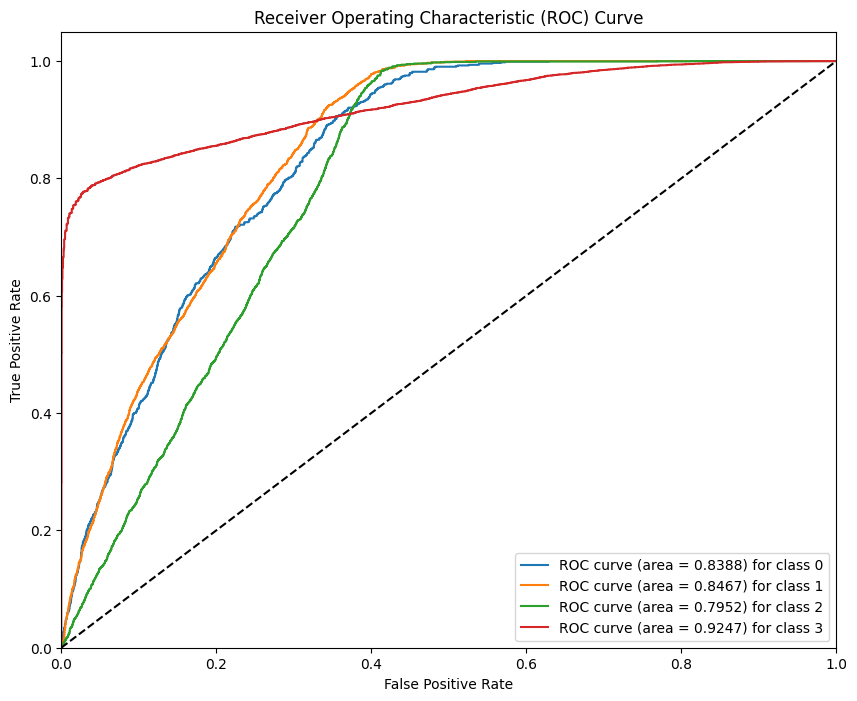

In [34]:
# Visualize Multiclass Receiver Operating Characteristic (ROC) for the optimized Logistic Regression model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
n_classes = Y_test_bin.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class
fpr[0], tpr[0], _ = roc_curve(Y_test_bin[:, 0], best_logistic_model.predict_proba(X_test[selected_features])[:, 0])
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(Y_test_bin[:, 1], best_logistic_model.predict_proba(X_test[selected_features])[:, 1])
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(Y_test_bin[:, 2], best_logistic_model.predict_proba(X_test[selected_features])[:, 2])
roc_auc[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(Y_test_bin[:, 3], best_logistic_model.predict_proba(X_test[selected_features])[:, 3])
roc_auc[3] = auc(fpr[3], tpr[3])
# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.4f}) for class {}'.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()